<a href="https://colab.research.google.com/github/DheniMoura/Analise-Exploratoria-de-Dados---Unitner/blob/main/Uninter_EDA_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dayanebravo/AED/main/pes_2012.csv')
df1.head(7)

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232
5,2012,Rondônia,Masculino,56,Preta,15 anos ou mais,10000,10000,232
6,2012,Rondônia,Feminino,23,Parda,15 anos ou mais,500,500,233


In [6]:
# Converte para numérico, transforma em float e substitui os erros por NaN
df1['V4718'] = pd.to_numeric(df1['V4718'], errors='coerce')
df1['V4720'] = pd.to_numeric(df1['V4720'], errors='coerce')

In [9]:
df = df1.dropna()  # criando um NOVO dataframe com as linhas inválidas removidas
# Remoção para fins didáticos, em situações reais essa pode não ser a melhor alternativa para lidar com dados inválidos
df.head(7)

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
5,2012,Rondônia,Masculino,56,Preta,15 anos ou mais,10000.0,10000.0,232
6,2012,Rondônia,Feminino,23,Parda,15 anos ou mais,500.0,500.0,233
8,2012,Rondônia,Feminino,39,Preta,11 anos,622.0,622.0,233


# Bibliotecas para gráficos

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
sn.set(style='whitegrid')

# Gráficos
## Gráficos de Barras

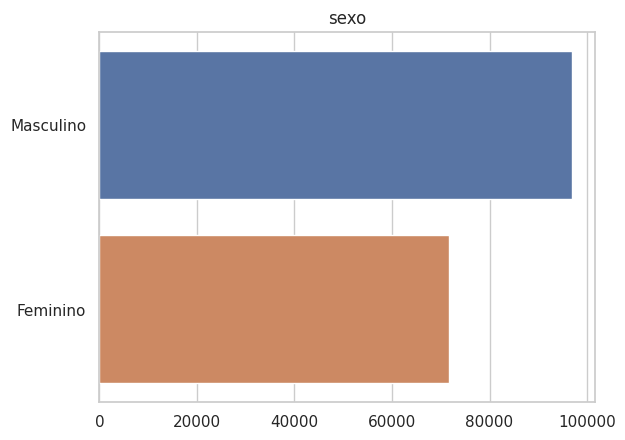

In [14]:
sn.countplot(y=df.V0302) # gráfico de barra - frequência da coluna indicada no eixo y
plt.title("sexo")

plt.ylabel('')
plt.xlabel('')

plt.show()

## Gráficos de Colunas

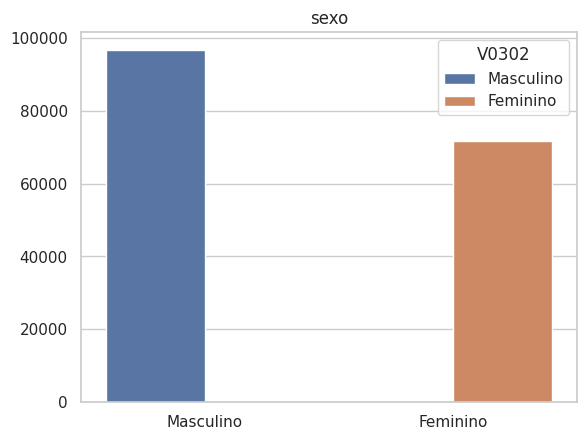

In [17]:
# gráfico de colunas simples

sn.countplot(x=df.V0302, hue=df.V0302) # gráfico de coluna - frequência da coluna indicada no eixo x - com legenda
plt.title("sexo")

plt.ylabel('')
plt.xlabel('')

# plt.legend(loc='center') #Para colocar a legenda no centro do gráfico

plt.show()

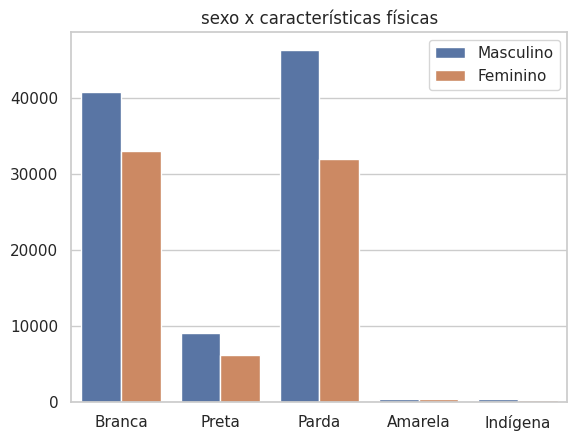

In [18]:
# gráfico de colunas agrupadas

sn.countplot(x=df.V0404, hue=df.V0302) # gráfico de coluna agrupada - frequência da coluna indicada no eixo x - com legenda
plt.title("sexo x características físicas")

plt.ylabel('')
plt.xlabel('')

plt.legend(loc='best') # Posição da legenda 

plt.show()

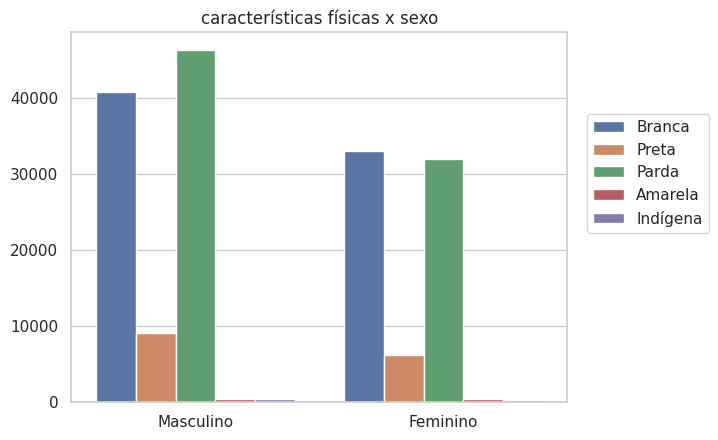

In [20]:
# gráfico de colunas agrupadas

sn.countplot(x=df.V0302, hue=df.V0404) # gráfico de coluna agrupada - frequência da coluna indicada no eixo x - com legenda
plt.title("características físicas x sexo")

plt.ylabel('')
plt.xlabel('')

plt.legend(bbox_to_anchor=(1.3,0.8)) # Posição da legenda 

plt.show()

## Gráfico de Setores

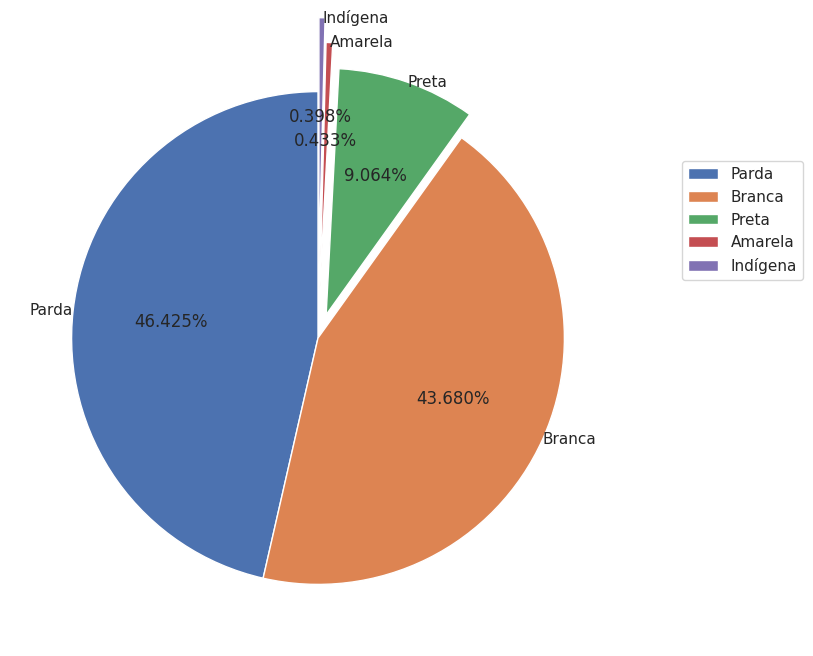

In [21]:
sizes = df.V0404.value_counts() # Definindo o tamanho das fatias

labels = df['V0404'].value_counts().index # Definindo os rótulos das fatias
plt.figure(figsize=(8,8))

plt.pie(sizes, labels=labels, explode=(0,0,0.1,0.2,0.3), autopct='%1.3f%%', labeldistance=1, startangle=90)

plt.legend(bbox_to_anchor=(1.3,0.8))
plt.show()

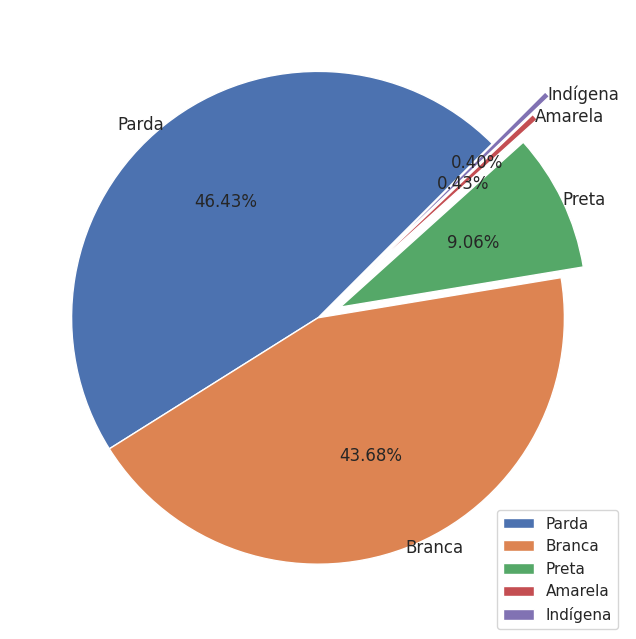

In [34]:
sizes = df['V0404'].value_counts() # Definindo o tamanho das fatias

sizes.plot(kind='pie', figsize=(8,8), fontsize=12, explode=(0,0,0.1,0.2,0.3), autopct='%1.2f%%', labeldistance=1, startangle=45)
# gráfico de setores/ tamanho gráfico e fonte/ fatias destacas (em ordem)/ percentual automático, distância da legenda, ponto de início 

plt.axis("equal") #escala dos eixos
plt.ylabel('')
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

## Gráfico de Frequência Absoluta

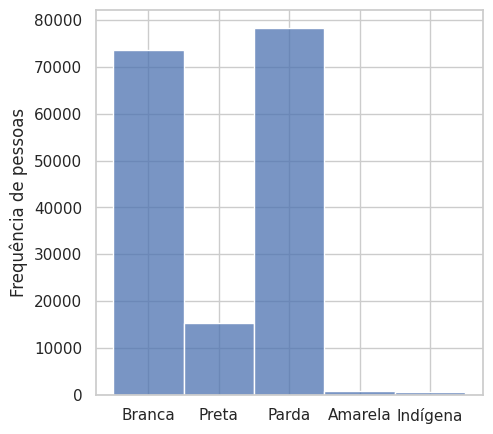

In [37]:
sizes = df.V0404 # coluna analisada
plt.figure(figsize=(5,5))

sn.histplot(sizes, bins=5) # bins = quantidade de intervalos

plt.ylabel('Frequência de pessoas')
plt.xlabel('')
plt.show()

## Gráfico de Frequência Acumulada

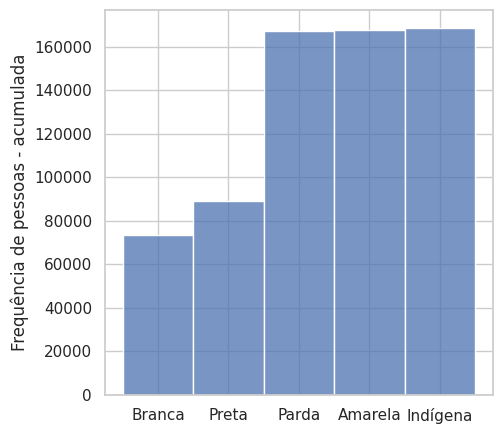

In [38]:
sizes = df.V0404 # coluna analisada
plt.figure(figsize=(5,5))

sn.histplot(sizes, bins=5, cumulative=True) # bins = quantidade de intervalos / acumulativo = verdadeiro

plt.ylabel('Frequência de pessoas - acumulada')
plt.xlabel('')
plt.show()

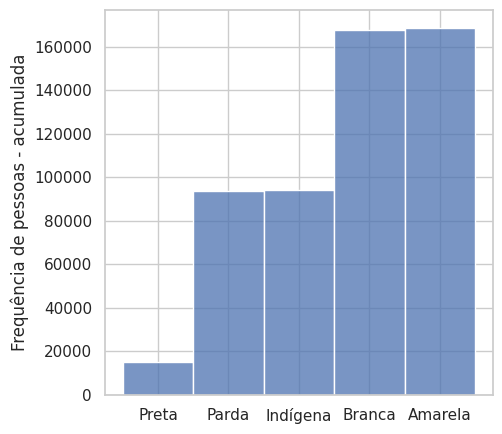

In [39]:
sizes = df.V0404.sort_values(ascending=False) # coluna analisada ordenada (ordem alfabética)
plt.figure(figsize=(5,5))

sn.histplot(sizes, bins=5, cumulative=True) # bins = quantidade de intervalos / acumulativo = verdadeiro

plt.ylabel('Frequência de pessoas - acumulada')
plt.xlabel('')
plt.show()

## Gráfico de Frequência Relativa

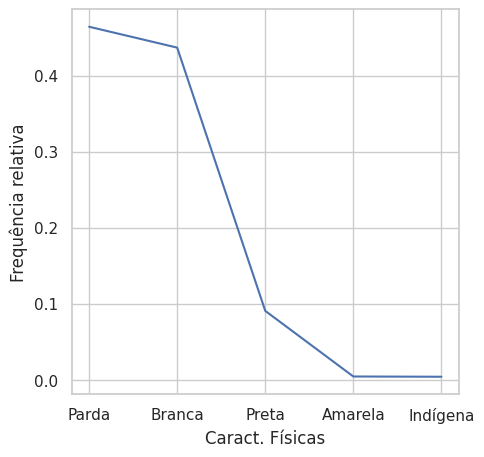

In [40]:
sizes = np.divide(df.V0404.value_counts(), len(df.V0404)) # coluna analisada dividida pelo seu tamanho
plt.figure(figsize=(5,5))

plt.plot(sizes) #Plotar dados

plt.ylabel('Frequência relativa')
plt.xlabel('Caract. Físicas')
plt.show()